## <span style="color:green"> Notebook - Phase mixing functions </span>
<span style="color:purple">Sinan Ozaydin, School of Geosciences, The University of Sydney, NSW 2006, Australia <br/> </span>
<span style="color:purple">sinan.ozaydin@protonmail.com</span>

This notebook will demonstrate how to use the phase mixing functions for electrical conductivity models. Phase mixing functions are used to calculate the bulk conductivity of a mineral assemblage with the given geometrical assumptions. Since electrical conductivity is a measure of how easily can electrons can flow through a system, the connectivity of conductive phases in a matrix has crucial importance when it comes to interpreting the electrical conductivity variations measured with MT method.

In ***pide***, there are six solid-state phase mixing functions are available to use. Which can be listed with the code snippet below:


In [1]:
import pide
import numpy as np
import matplotlib.pyplot as plt

p_obj = pide.pide() #forming the pide object
mixing_list = p_obj.list_phs_mix_methods()

Solid Phase Mixing Models:
0.   Generalized Archie's Law (Glover, 2010)
1.   Hashin-Shtrikman Lower Bound (Berryman, 1995)
2.   Hashin-Shtrikman Upper Bound (Berryman, 1995)
3.   Parallel Model (Guegen and Palciauskas, 1994)
4.   Perpendicular Model (Guegen and Palciauskas, 1994)
5.   Random Model (Guegen and Palciauskas, 1994)


$$\sigma = \sum_{i = 1}^n \sigma_{i} \phi^{m} \qquad \text{(1)} \quad \text{Generalized Archie's Law}$$
$$\sigma = \left( \sum_{i = 1}^n \frac{\phi_i}{\sigma_i + 2\sigma_{min}}   \right)^{-1} - 2\sigma_{min} \qquad \text{(2)} \quad \text{Hashin-Shtrikman Lower Bound}$$
$$\sigma = \left( \sum_{i = 1}^n \frac{\phi_i}{\sigma_i + 2\sigma_{max}}   \right)^{-1} - 2\sigma_{max} \qquad \text{(3)} \quad \text{Hashin-Shtrikman Upper Bound}$$
$$\sigma = \sum_{i = 1}^n \phi_i \sigma_i \quad \text{(4)} \quad \text{Parallel Model}$$
$$\sigma = \sum_{i = 1}^n \frac{\sigma_i}{\phi_i} \quad \text{(5)} \quad \text{Perpendicular Model}$$
$$\sigma = \prod \sigma_i^{\phi_i} \quad \text{(6)} \quad \text{Random Model}$$


where volumetrically dominant cementation exponent for m in Generalized Archie's law is:

$$m_j = log \left( 1 - \sum_{i \neq j} \phi_i^{m_j} \right) / log \left( 1 - \sum_{i \neq j} \phi_i \right) \quad \text{(7)}$$


In [2]:
temp = np.arange(600,1300,5) #setting up temperature array
p_obj = pide.pide() #creating the initial object

p_obj.set_temperature(temp) #setting temperature array in K
p_obj.set_pressure(1.0) #GPa

#Setting a basic garnet-lherzolite matrix
p_obj.set_composition_solid_mineral(ol = 0.6,opx = 0.25,cpx = 0.1, garnet= 0.05)
#Setting m values for Generalised Archie's Law
#Here the m value for the dominant phase will be overwritten and will be recalculated as m_j
p_obj.set_phase_interconnectivities(ol = 1, opx = 2, cpx = 4, gt = 4, melt = 1)

In [3]:
#Setting bulk water(hydroxyl(OH^-1)) content to 100 ppm H2O wt
p_obj.set_bulk_water(100)
#Now we have to distribute this water content using water partitioning coefficients.
#To do this, let's list all the possible water partitioning coefficients first, for the minerals we used.
p_obj.list_mantle_water_partitions_solid('opx')
p_obj.list_mantle_water_partitions_solid('cpx')
p_obj.list_mantle_water_partitions_solid('garnet')

Mantle solid-state water partition coefficients for the mineral: opx
0.  Ozaydin2020_Opx1 -  Type 1
1.  Ozaydin2020_Opx2 -  Type 1
2.  Aubaud2004_Opx -  Type 0  -  Opx/Ol: 8.92
3.  Demouchy2017_Opx -  Type 0  -  Opx/Ol: 5.6
4.  Ferot2012_Opx -  Type 1
5.  Grant2006_Opx -  Type 0  -  Opx/Ol: 2.52
6.  Hauri2006_Opx -  Type 0  -  Opx/Ol: 6.93
7.  Koga2003_Opx -  Type 0  -  Opx/Ol: 12.0
8.  Kovacs2012_Opx -  Type 0  -  Opx/Ol: 5.34
9.  Kovacs2012_Opx2 -  Type 1
10.  Novella2014_Opx -  Type 0  -  Opx/Ol: 1.91
11.  Sakurai2014_Opx -  Type 1
12.  Withers2011_Opx1 -  Type 0  -  Opx/Ol: 1.505
13.  Withers2011_Opx2 -  Type 1
                 
                 
Mantle solid-state water partition coefficients for the mineral: cpx
0.  Ozaydin2020_Cpx1 -  Type 1
1.  Ozaydin2020_Cpx2 -  Type 1
2.  Aubaud2004_Cpx -  Type 0  -  Cpx/Ol: 12.5
3.  Aubaud2004_Cpx2 -  Type 1
4.  Demouchy2016_Cpx -  Type 1
5.  Demouchy2017_Cpx -  Type 0  -  Cpx/Ol: 10.6
6.  Demouchy2017_Cpx2 -  Type 1
7.  Hauri2006_Cpx -  Ty

['Novella2014_Gt',
 'Mookherjee2010_Gt1',
 'Mookherjee2010_Gt2',
 'Mookherjee2010_Gt3',
 'Hauri2006_Gt']

In [4]:
p_obj.set_mantle_water_partitions(opx_ol = 3, cpx_ol = 6, garnet_ol = 0)
p_obj.mantle_water_distribute()

In [5]:
cond_lists = []
for i in range(0,len(mixing_list)):
	p_obj.set_solid_phs_mix_method(method = i)
	cond = p_obj.calculate_conductivity()
	cond_lists.append(cond)

In [6]:
#Starting the new calculation space by resetting the object. Alternatively, one can also create a new pide object to
#perform calculations. However, using the same object can cause mismatches between array lengths that are assigned
#before.
p_obj.reset()

#setting up the new thermodynamic and compositional environment
temp_melt = np.arange(1300,1800,5)
p_obj.set_temperature(temp_melt)
p_obj.set_pressure(1.0)
p_obj.set_composition_solid_mineral(ol = 0.6,opx = 0.25,cpx = 0.1, garnet= 0.05)

p_obj.set_phase_interconnectivities(ol = 1, opx = 2, cpx = 4, gt = 4, melt = 1)
p_obj.set_mantle_water_partitions(opx_ol = 3, cpx_ol = 6, garnet_ol = 0)
#Setting bulk water(hydroxyl(OH^-1)) content to 100 ppm H2O wt
p_obj.set_bulk_water(100)
p_obj.mantle_water_distribute()
p_obj.set_solid_phs_mix_method(method = 1) #H-S lower bound
cond_solid_matrix_hT = p_obj.calculate_conductivity()

melt_mixing_lists = p_obj.list_phs_melt_fluid_mix_methods()

Solid-Fluid/Melt Mixing models:
0.   Modified Archie's Law (Glover et al., 2000)
1.   Tubes Model (ten Grotenhuis et al., 2005)
2.   Spheres Model (ten Grotenhuis et al., 2005)
3.   Modified Brick-layer Model (Schilling et al., 1997)
4.   Hashin-Shtrikman Upper-Bound (Glover et al., 2000)
5.   Hashin-Shtrikman Lower-Bound (Glover et al., 2000)


In [7]:
p_obj.set_solid_phs_mix_method(method = 0)
p_obj.set_melt_or_fluid_mode(mode = 'melt')
p_obj.set_melt_properties(co2 = 10e4, water = 1e4)
melt_frac = 0.05
p_obj.set_melt_fluid_frac(melt_frac)
p_obj.set_melt_fluid_interconnectivity(2)

In [8]:

cond_melt_lists = []

for i in range(0,len(melt_mixing_lists)):
	
	
	p_obj.set_solid_melt_fluid_mix_method(method = i)
	cond = p_obj.calculate_conductivity()

	cond_melt_lists.append(cond)

In [9]:
cond_melt = p_obj.calculate_melt_conductivity(method = 'array')

(1e-05, 100)

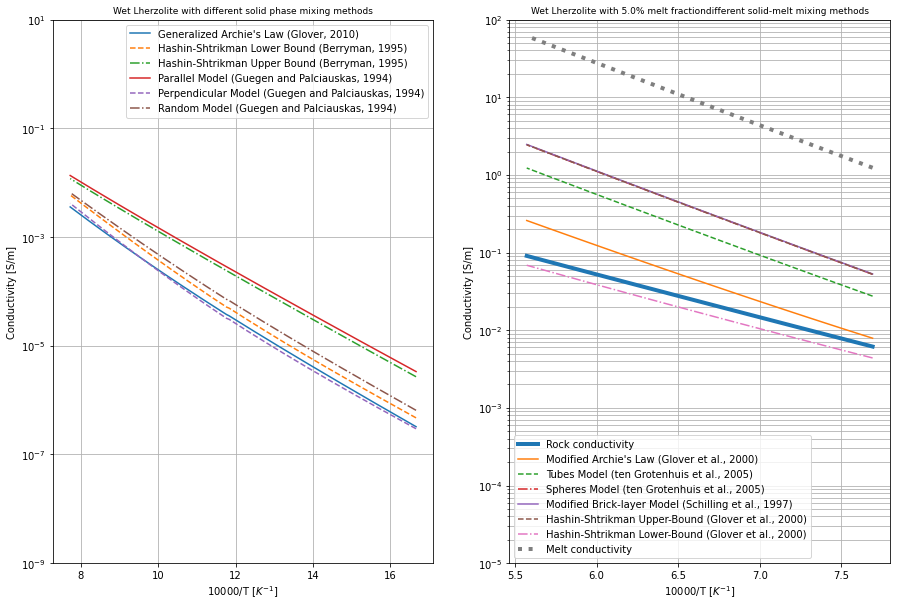

In [11]:
lines = ['-','--','-.','-','--','-.','-','--','-.','-','--','-.','-','--','-.']

fig = plt.figure(figsize = (15,10))
ax = plt.subplot(121)
for i in range(0,len(mixing_list)):
	ax.plot(1e4/temp, cond_lists[i], label = mixing_list[i], linestyle = lines[i])
ax.set_yscale('log')
ax.set_xlabel('10000/T [$K^{-1}$]')
ax.set_ylabel('Conductivity [S/m]')
ax.grid(which = 'both')
ax.legend(fontsize = 10)
ax.set_title('Wet Lherzolite with different solid phase mixing methods',fontsize = 9)
ax.set_ylim((1e-9,10))

ax2 = plt.subplot(122)
ax2.plot(1e4/temp_melt, cond_solid_matrix_hT, label = 'Rock conductivity', linestyle = '-',linewidth = 4)
for i in range(0,len(mixing_list)):
	ax2.plot(1e4/temp_melt, cond_melt_lists[i], label = melt_mixing_lists[i], linestyle = lines[i])
	
ax2.plot(1e4/temp_melt, cond_melt, label = 'Melt conductivity', linestyle = ':',linewidth = 4)

ax2.set_yscale('log')
ax2.set_xlabel('10000/T [$K^{-1}$]')
ax2.set_ylabel('Conductivity [S/m]')
ax2.grid(which = 'both')
ax2.legend(fontsize = 10)
ax2.set_title('Wet Lherzolite with ' +str(melt_frac*100) + '% melt fraction''different solid-melt mixing methods',fontsize = 9)
ax2.set_ylim((1e-5,100))